## Time Series - Market Arrivals Model

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [153]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

In [154]:
df = pd.read_csv('MonthWiseMarketArrivals_Clean.csv')
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


Converting date column to pandas datetime period & will set index later on  

In [155]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


Setting date as index  

In [156]:
df['index'] = pd.PeriodIndex(df['date'], freq = 'M')

In [157]:
df.set_index('index', inplace = True,)

In [158]:
df = df.sort_values(by = 'index')

In [159]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
index,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Basic Exploration of Data  

In [160]:
df['market'].value_counts()

LASALGAON(MS)         242
PIMPALGAON(MS)        224
MANMAD(MS)            218
LONAND(MS)            211
MAHUVA(GUJ)           210
                     ... 
JALGAON(WHITE)          1
RAJAHMUNDRY(AP)         1
NEEMUCH(MP)             1
SRIGANGANAGAR(RAJ)      1
CHALLAKERE(KNT)         1
Name: market, Length: 120, dtype: int64

In [161]:
df['state'].value_counts()

MS     4354
KNT     958
GUJ     929
UP      617
PB      593
RAJ     462
TN      350
MP      309
AP      278
HR      233
WB      187
JK      163
DEL     158
BHR     140
ASM     134
OR      129
JH      123
KEL      55
HP       40
KER      13
CH        2
Name: state, dtype: int64

In [162]:
df['city'].value_counts()

LASALGAON        242
PIMPALGAON       224
MANMAD           218
LONAND           211
MAHUVA           210
                ... 
MEERUT             1
RAJAHMUNDRY        1
NEEMUCH            1
SRIGANGANAGAR      1
CHALLAKERE         1
Name: city, Length: 117, dtype: int64

In [163]:
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


Average Min Price for Onion across all states is 646.  
Average Max Price for Onion across all states is 1212.  
Average Modal Price for Onion across all states is 984.  

In [164]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
index,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Average Modal Price for Onions in Maharashtra  

In [165]:
df[df['state'] == 'MS']['priceMod'].mean()

843.9331649058337

Average Modal Price for Onions in Karnataka  

In [166]:
df[df['state'] == 'KNT']['priceMod'].mean()

899.5427974947808

Average Modal Price for Onions in Gujarat  

In [167]:
df[df['state'] == 'GUJ']['priceMod'].mean()

797.5102260495156

In [168]:
df_mum = df.loc[df['city'] == 'MUMBAI'].copy()
df_mum.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
index,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2004-02,MUMBAI,February,2004,239350,614,834,736,MS,MUMBAI,2004-02-01
2004-03,MUMBAI,March,2004,238000,436,557,498,MS,MUMBAI,2004-03-01
2004-04,MUMBAI,April,2004,198200,346,475,397,MS,MUMBAI,2004-04-01
2004-05,MUMBAI,May,2004,166430,357,466,405,MS,MUMBAI,2004-05-01


Will drop all redundant columns  

In [169]:
df_mum.drop(['market', 'month', 'year', 'priceMin', 'priceMax', 'state', 'city'], axis = 1, inplace = True)

In [170]:
df_mum.head()

,quantity,priceMod,date
index,,,
2004-01,267100,849,2004-01-01
2004-02,239350,736,2004-02-01
2004-03,238000,498,2004-03-01
2004-04,198200,397,2004-04-01
2004-05,166430,405,2004-05-01


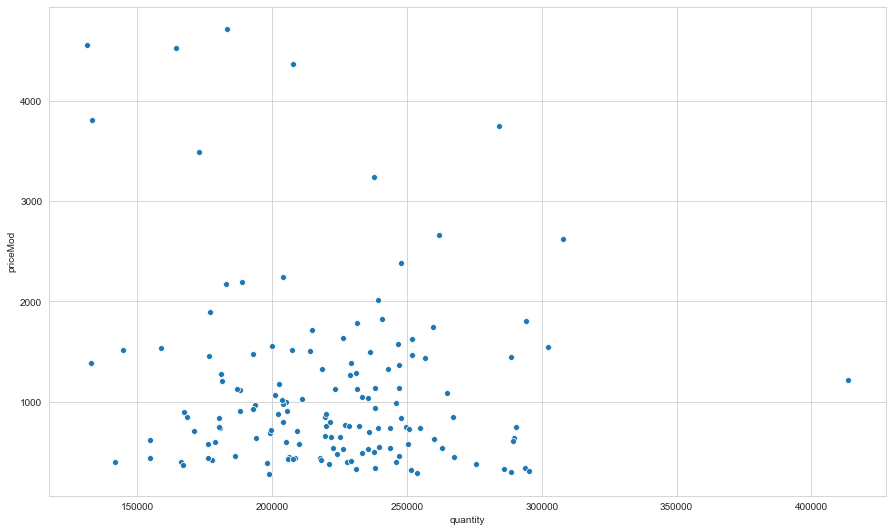

In [187]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,9))
sns.scatterplot(x = df_mum['quantity'], y = df_mum['priceMod'], palette = 'viridis')

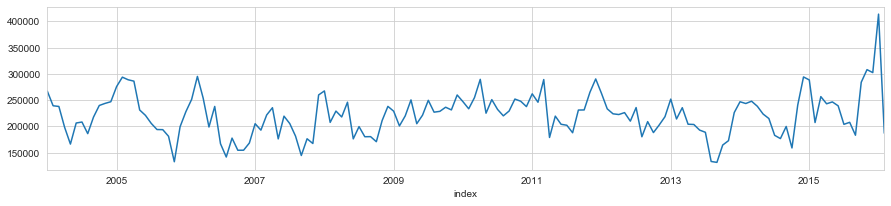

In [180]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,3))
df_mum['quantity'].plot()

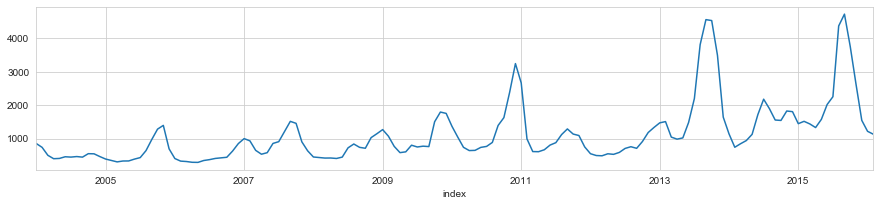

In [174]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,3))
df_mum['priceMod'].plot()

The prices have subsequently touched its peak in the late 20's i.e around 2013 to 2016.  
The spikes on the above graph shows, modal price for Onions have touched 4000+  

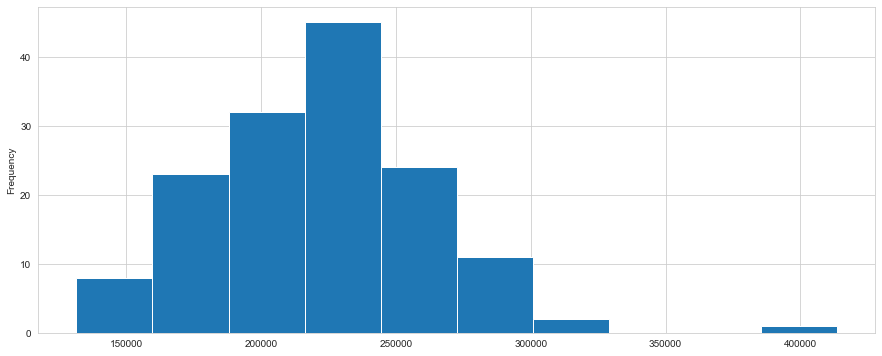

In [189]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
df_mum['quantity'].plot(kind = 'hist')

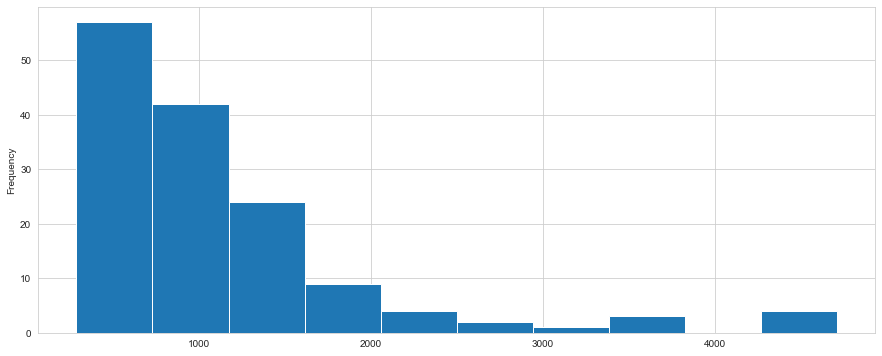

In [190]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
df_mum['priceMod'].plot(kind = 'hist')

As per above graph, the values are not normal distributed & we will have normalize it  

In [191]:
df_mum['pricelog'] = np.log(df_mum['priceMod'])
df_mum['pricelog']

index
2004-01    6.744059
2004-02    6.601230
2004-03    6.210600
2004-04    5.983936
2004-05    6.003887
             ...   
2015-10    8.228978
2015-11    7.872074
2015-12    7.340836
2016-01    7.102499
2016-02    7.028201
Freq: M, Name: pricelog, Length: 146, dtype: float64

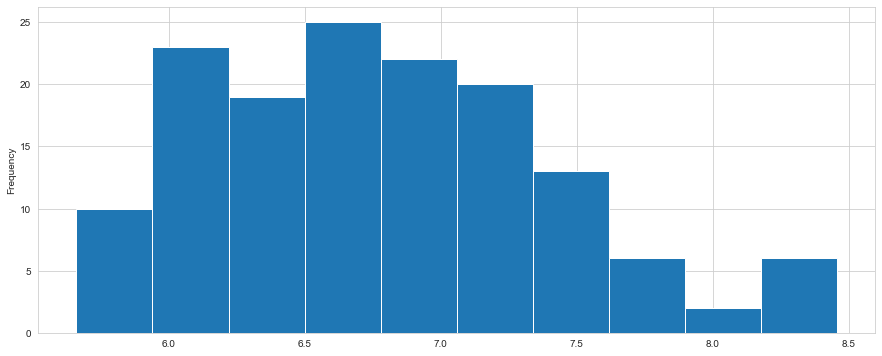

In [193]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,6))
df_mum['pricelog'].plot(kind = 'hist')

After applying log transformation, we have normally distrbuted our 'Modal Price'  

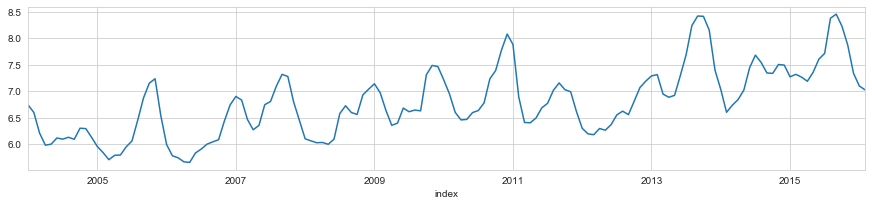

In [195]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,3))
df_mum['pricelog'].plot()

Dickey Fuller Test  

In [196]:
adful = adfuller(df_mum['priceMod'], autolag='AIC')
adful

(-4.437736321058303,
 0.00025436714348672806,
 2,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 1909.6057017652388)

In [197]:
test = pd.Series(adful[0:4], index=['Test Statistic','P-Value','Lags Used','No of Observations Used'])
for i,j in adful[4].items():
    test['Critical Value (%s)'%i] = j
    
print (test)

Test Statistic              -4.437736
P-Value                      0.000254
Lags Used                    2.000000
No of Observations Used    143.000000
Critical Value (1%)         -3.476927
Critical Value (5%)         -2.881973
Critical Value (10%)        -2.577665
dtype: float64


In [199]:
df_mum['price_log_ma'] = df_mum['pricelog'].rolling(12).mean()
df_mum['price_log_ma']

index
2004-01         NaN
2004-02         NaN
2004-03         NaN
2004-04         NaN
2004-05         NaN
             ...   
2015-10    7.651143
2015-11    7.681554
2015-12    7.668570
2016-01    7.654238
2016-02    7.629767
Freq: M, Name: price_log_ma, Length: 146, dtype: float64

<Figure size 1080x216 with 0 Axes>

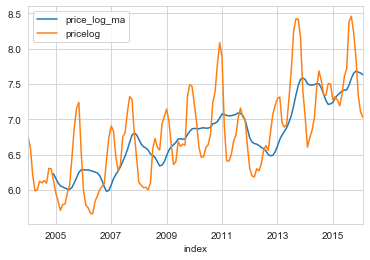

In [201]:
plt.figure(figsize = (15,3))
df_mum.plot(kind = 'line', y = ["price_log_ma", "pricelog"])

In [203]:
df_mum['normal_price'] = np.exp(df_mum['price_log_ma'])
df_mum.head()

,quantity,priceMod,date,pricelog,price_log_ma,normal_price
index,,,,,,
2004-01,267100,849,2004-01-01,6.744059,NaN,NaN
2004-02,239350,736,2004-02-01,6.601230,NaN,NaN
2004-03,238000,498,2004-03-01,6.210600,NaN,NaN
2004-04,198200,397,2004-04-01,5.983936,NaN,NaN
2004-05,166430,405,2004-05-01,6.003887,NaN,NaN


In [208]:
df_mum['normal_price'] = df_mum['normal_price'].fillna(0)

In [206]:
forecast_ma = df_mum['price_log_ma'].tail(12).mean()
forecast_ma

7.5237154378299245

In [209]:
from sklearn.metrics import mean_squared_error
rmse_score = np.sqrt(mean_squared_error(df_mum['priceMod'], df_mum['normal_price']))
rmse_score

714.1343859149121

In [210]:
mean_price_mod = df_mum['pricelog'].mean()
df_mum['mean_price_mod'] = np.exp(mean_price_mod)
df_mum.head()

,quantity,priceMod,date,pricelog,price_log_ma,normal_price,mean_price_mod
index,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,NaN,0.0,889.100239
2004-02,239350,736,2004-02-01,6.601230,NaN,0.0,889.100239
2004-03,238000,498,2004-03-01,6.210600,NaN,0.0,889.100239
2004-04,198200,397,2004-04-01,5.983936,NaN,0.0,889.100239
2004-05,166430,405,2004-05-01,6.003887,NaN,0.0,889.100239


In [212]:
rmse_mean_score = np.sqrt(mean_squared_error(df_mum['priceMod'], df_mum['mean_price_mod']))
rmse_mean_score

908.477284398645

In [ ]:
df_bang.index = pd.to_datetime(df_bang.date)
df_bang.head()

In [213]:
df_mum['index'] = pd.to_datetime(df_mum['date'])
df_mum.head()

,quantity,priceMod,date,pricelog,price_log_ma,normal_price,mean_price_mod,index
index,,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,NaN,0.0,889.100239,2004-01-01
2004-02,239350,736,2004-02-01,6.601230,NaN,0.0,889.100239,2004-02-01
2004-03,238000,498,2004-03-01,6.210600,NaN,0.0,889.100239,2004-03-01
2004-04,198200,397,2004-04-01,5.983936,NaN,0.0,889.100239,2004-04-01
2004-05,166430,405,2004-05-01,6.003887,NaN,0.0,889.100239,2004-05-01


In [217]:
df_mum['index'] = df_mum['index'].to_timestamp()
df_mum

,quantity,priceMod,date,pricelog,price_log_ma,normal_price,mean_price_mod,index
index,,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,NaN,0.000000,889.100239,NaT
2004-02,239350,736,2004-02-01,6.601230,NaN,0.000000,889.100239,NaT
2004-03,238000,498,2004-03-01,6.210600,NaN,0.000000,889.100239,NaT
2004-04,198200,397,2004-04-01,5.983936,NaN,0.000000,889.100239,NaT
2004-05,166430,405,2004-05-01,6.003887,NaN,0.000000,889.100239,NaT
...,...,...,...,...,...,...,...,...
2015-10,284078,3748,2015-10-01,8.228978,7.651143,2103.048702,889.100239,NaT
2015-11,308071,2623,2015-11-01,7.872074,7.681554,2167.987092,889.100239,NaT
2015-12,302409,1542,2015-12-01,7.340836,7.668570,2140.018320,889.100239,NaT


In [221]:
ts = df_mum['pricelog'] - df_mum['price_log_ma']
ts

index
2004-01         NaN
2004-02         NaN
2004-03         NaN
2004-04         NaN
2004-05         NaN
             ...   
2015-10    0.577834
2015-11    0.190520
2015-12   -0.327734
2016-01   -0.551739
2016-02   -0.601566
Freq: M, Length: 146, dtype: float64

In [222]:
df_mum['price_shift'] = df_mum['pricelog'].shift()

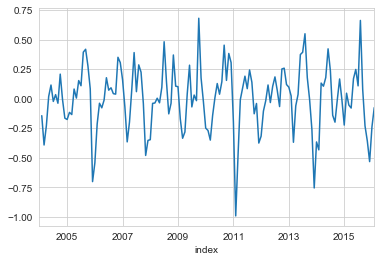

In [223]:
df_mum['pricelogdiff'] = df_mum['pricelog'] - df_mum['price_shift']
df_mum['pricelogdiff'].plot()

In [224]:
ar = df_mum['pricelog']
ar_diff = df_mum['pricelogdiff']
ar_diff.dropna(inplace = True)

In [226]:
acf = acf(ar_diff, nlags = 20)
acf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


array([ 1.        ,  0.53786906,  0.10589576, -0.21784464, -0.34071619,
       -0.38726621, -0.33305458, -0.20040583, -0.05925486,  0.11139304,
        0.20233274,  0.22320243,  0.09014861,  0.075918  ,  0.08492476,
        0.0535322 , -0.13866775, -0.20165534, -0.27233067, -0.22794263,
       -0.20673988])

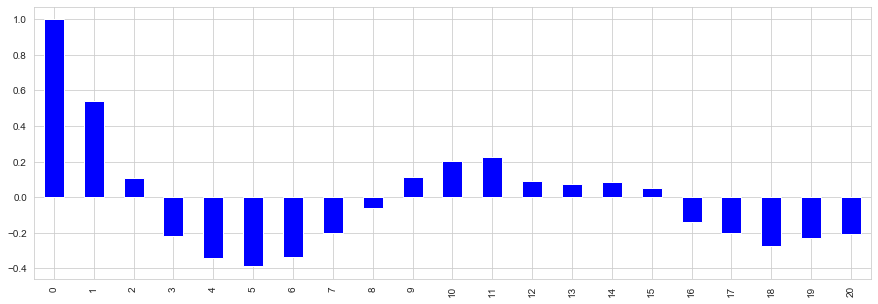

In [228]:
plt.figure(figsize = (15,5))
acf_plot = pd.Series(acf)
acf_plot.plot(kind = 'bar', color = 'blue')

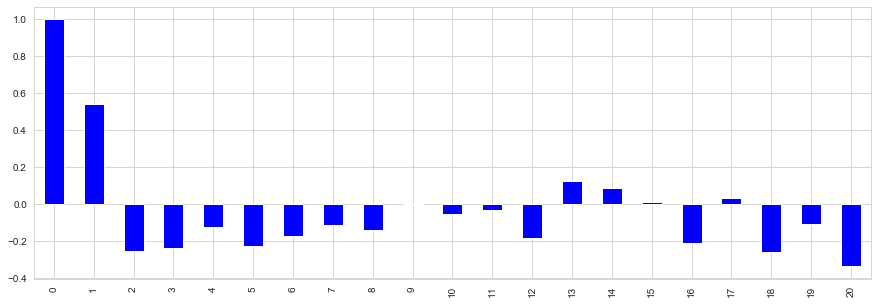

In [230]:
plt.figure(figsize = (15,5))
pacf_r = pacf(ar_diff, nlags = 20, method = 'ols')
pacf_plot = pd.Series(pacf_r)
pacf_plot.plot(kind = 'bar', color = 'b')

In [241]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [259]:
train, test = df_mum.iloc[:130, 1], df_mum.iloc[130:, 0]

In [267]:
model = ExponentialSmoothing(train, seasonal='mul', seasonal_periods=12).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [274]:
pred

2014-11    1564.566844
2014-12    1265.531376
2015-01    1031.002446
2015-02     743.218352
2015-03     577.852205
2015-04     499.454988
2015-05     519.942486
2015-06     737.963204
2015-07     991.423275
2015-08    1273.018802
2015-09    1406.840498
2015-10    1597.113681
2015-11    1564.566844
2015-12    1265.531376
2016-01    1031.002446
2016-02     743.218352
Freq: M, dtype: float64